# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [317]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [271]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


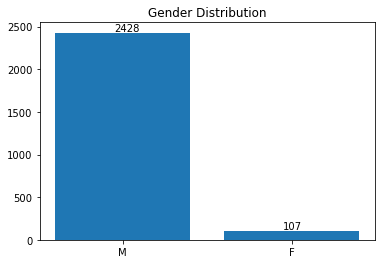

In [273]:
# with matplotlib
x=kill.gender.unique()
y=kill.gender.value_counts()
bars = plt.bar(x, height=y)

for bar in bars:
    plt.text(bar.get_x()+0.35, bar.get_height() + 20, bar.get_height())

plt.title('Gender Distribution')

plt.show()

## 2: Plot 7 most common kill weapons

We could suspect that there are some equal values when we sort the data according common killing weapons. We could see that machete an unknown weapon have equal values as it can be seen just below. 

In [274]:
kill.armed.value_counts(sort=True)[0:9]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
Taser                9
Name: armed, dtype: int64

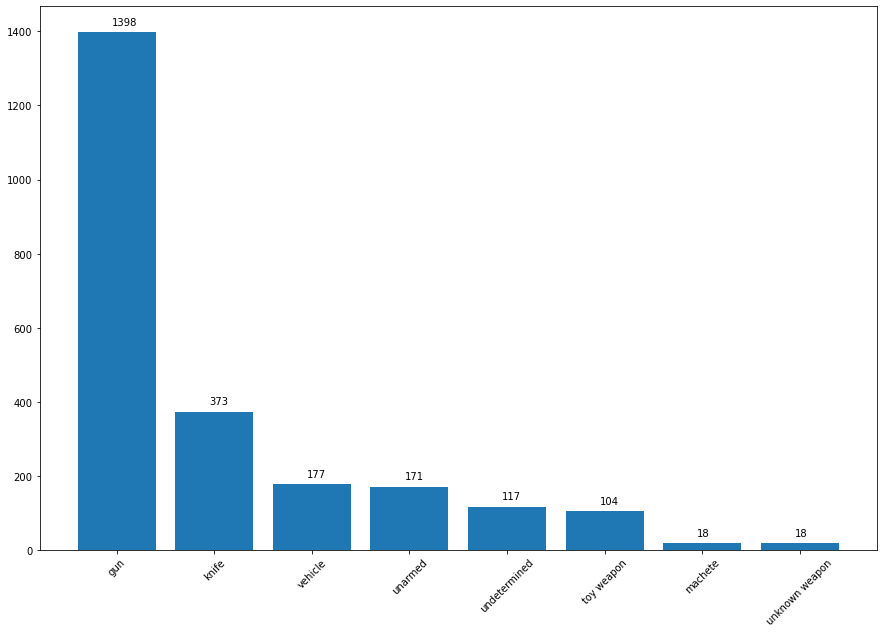

In [291]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
x=kill.armed.value_counts(sort=True)[0:8].index
y=kill.armed.value_counts(sort=True)[0:8]
bars = ax.bar(x, height=y)

for bar in bars:
    plt.text(bar.get_x()+0.35, bar.get_height() + 20, bar.get_height())

xlabel=kill.armed.value_counts(sort=True)[0:8]
plt.xticks(range(len(x)), x ,  rotation=45)

plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [292]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [293]:
kill.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.0,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [344]:
kill['age_cat']=np.where(kill['age']>25,'above25','under25')

In [330]:
kill['age_cat'].value_counts()

above25    1905
under25     553
Name: age_cat, dtype: int64

We shouuld focus on the values on the column of 'age'. As it can be verified below there are non values in this column. Therefore, we drop these rows with non values. 

In [300]:
kill['age'].isnull().value_counts()

False    2458
True       77
Name: age, dtype: int64

Now, we could drop the rows with non values in the column of 'age'.

In [325]:
kill.dropna(axis=0, subset=['age'], inplace=True)

In [326]:
kill['age'].isnull().value_counts()

False    2458
Name: age, dtype: int64

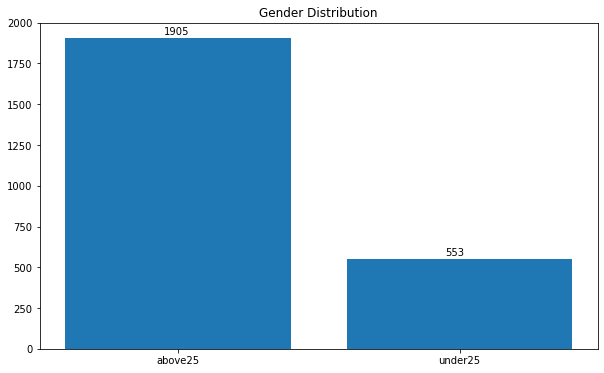

In [331]:
# with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
x=kill['age_cat'].value_counts().index
y=kill['age_cat'].value_counts()
bars = ax.bar(x, height=y)

for bar in bars:
    plt.text(bar.get_x()+0.35, bar.get_height() + 20, bar.get_height())

plt.title('Gender Distribution')

plt.show()

## 4: Plot number of killed poeple by race

Remember we are using now a reduced dataframe as we have deleted rows with non values in the column of 'age'.

In [332]:
kill.race.value_counts()

W    1192
B     609
H     413
A      38
N      31
O      28
Name: race, dtype: int64

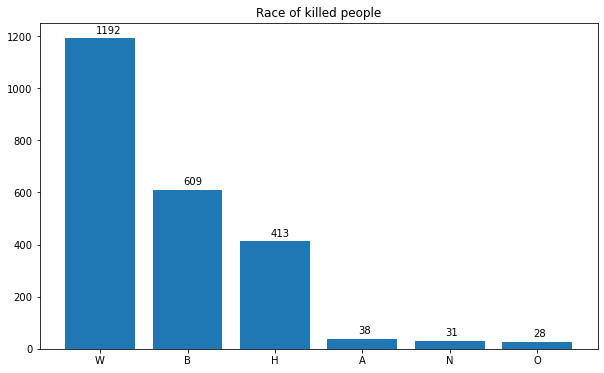

In [335]:
# with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
x=kill.race.value_counts().index
y=kill.race.value_counts()
bars = ax.bar(x, height=y)

for bar in bars:
    plt.text(bar.get_x()+0.35, bar.get_height() + 20, bar.get_height())

plt.title('Race of killed people')

plt.show()

## 5: Killed People According to Races (Pie Chart)

In [336]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,under25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


We have still non values in our 

In [238]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [337]:
kill.race.value_counts()

W    1192
B     609
H     413
A      38
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [338]:
kill.dropna(inplace=True)

In [339]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [340]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [341]:
kill.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [342]:
arr=np.array(kill.race.value_counts())
arr

array([1168,  592,  401,   36,   29,   28], dtype=int64)

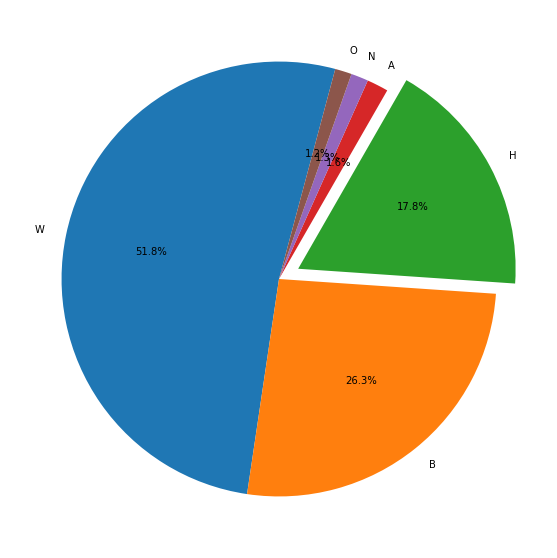

In [343]:
# matplotlib

plt.figure(figsize=(14, 10))
my_labels = kill.race.value_counts().index
plt.pie(arr,labels=my_labels,autopct='%1.1f%%',startangle=75, explode=[0, 0, 0.1, 0, 0, 0])

plt.axis()
plt.show()